### 인공 신경망

In [1]:
import numpy as np
from sklearn.datasets import load_iris

from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/var/folders/lx/t6fh69qs69d9s21bvsl3_ynr0000gn/T/ipykernel_12154/124189236.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


### ANN
#### Perceptron : TLU (step function)
#### DNN

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.15.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_vaild, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_vaild, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [11]:
class_name = ["Tshirts", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

In [12]:
class_name[y_train[0]]

'Coat'

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape =[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
weights, biases = model.layers[1].get_weights()

weights

array([[-0.04229334,  0.02003381,  0.05379018, ...,  0.04297861,
         0.03997729, -0.01591972],
       [-0.03399736, -0.05461124,  0.03495067, ..., -0.05268855,
        -0.03813213, -0.07114702],
       [ 0.03252406, -0.02331918, -0.02936111, ...,  0.04411807,
        -0.00588526,  0.06069176],
       ...,
       [-0.05580724,  0.03517061,  0.06221692, ..., -0.00755796,
         0.01409215, -0.05738231],
       [-0.00359009, -0.02918533,  0.03137223, ...,  0.01869266,
         0.03293087, -0.07385597],
       [-0.01025351, -0.05036231,  0.0335895 , ...,  0.02481538,
        -0.01482551,  0.0689225 ]], dtype=float32)

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_vaild, y_vaild))

Epoch 1/30
1719/1719 [==============================] - 2s 882us/step - loss: 0.7150 - accuracy: 0.7641 - val_loss: 0.5828 - val_accuracy: 0.7980
Epoch 2/30
1719/1719 [==============================] - 1s 788us/step - loss: 0.4893 - accuracy: 0.8307 - val_loss: 0.4671 - val_accuracy: 0.8338
Epoch 3/30
1719/1719 [==============================] - 1s 748us/step - loss: 0.4449 - accuracy: 0.8439 - val_loss: 0.4346 - val_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 1s 744us/step - loss: 0.4160 - accuracy: 0.8544 - val_loss: 0.4057 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 1s 749us/step - loss: 0.3971 - accuracy: 0.8609 - val_loss: 0.3844 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 1s 735us/step - loss: 0.3791 - accuracy: 0.8667 - val_loss: 0.3764 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 1s 742us/step - loss: 0.3669 - accuracy: 0.8700 - val_loss: 0.3699 -

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_vaild.shape)
print(y_vaild.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [27]:
print(len(X_train))
print(len(y_train))
print(len(X_vaild))
print(len(y_vaild))


55000
55000
5000
5000


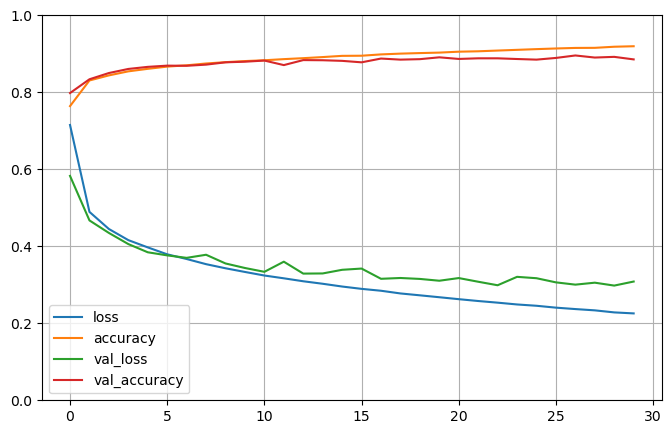

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 482us/step - loss: 0.3381 - accuracy: 0.8800


[0.33812272548675537, 0.8799999952316284]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

### Wide & Deep 
복잡한 패턴 + 간단한 규칙 모두 학습 가능

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)




input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs =[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# y_pred = model.predict()



Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.3775 - val_loss: 3.8809
Epoch 2/20
363/363 [==============================] - 0s 355us/step - loss: 0.7462 - val_loss: 1.2141
Epoch 3/20
363/363 [==============================] - 0s 416us/step - loss: 0.6466 - val_loss: 0.8460
Epoch 4/20
363/363 [==============================] - 0s 472us/step - loss: 0.5978 - val_loss: 0.6499
Epoch 5/20
363/363 [==============================] - 0s 353us/step - loss: 0.5593 - val_loss: 0.5970
Epoch 6/20
363/363 [==============================] - 0s 354us/step - loss: 0.5295 - val_loss: 0.5446
Epoch 7/20
363/363 [==============================] - 0s 360us/step - loss: 0.5064 - val_loss: 0.5714
Epoch 8/20
363/363 [==============================] - 0s 385us/step - loss: 0.4880 - val_loss: 0.5081
Epoch 9/20
363/363 [==============================] - 0s 370us/step - loss: 0.4727 - val_loss: 0.5213
Epoch 10/20
363/363 [==============================] - 0s 367us/step - loss: 0.4596 

In [45]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 25ms/step


array([[2.0305796],
       [2.0849693],
       [3.5142972]], dtype=float32)

In [46]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 269us/step - loss: 0.3972
